### Test Uniform, Default, Xavier and He Initialization on MNIST dataset with tanh activation

In [26]:
# Import necessary libraries

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

#Set the manual seed for random numbers
torch.manual_seed(0)

#### Neural Network Module and Training Function

Define the neural network module or class with He Initialization


In [43]:
#Define the class for neural network with He initialization

class NetHe(nn.Module):
    
    #Constructor
    def __init__(self, Layers):
        super(NetHe, self).__init__()
        self.hidden = nn.ModuleList()
        
        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            torch.nn.init.kaiming_uniform_(linear.weight, nonlinearity = "relu")
            self.hidden.append(linear)
            
        
    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L-1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
            return x

Define the neural network module or class with Xavier Initialization


In [28]:
# Define the neural network with Xavier initialization

class Net_Xavier(nn.Module):
    
    # Constructor
    def __init__(self, Layers):
        super(Net_Xavier, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            torch.nn.init.xavier_uniform_(linear.weight)
            self.hidden.append(linear)
    
    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

Define the neural network module with Uniform Initialization:


In [29]:
# Define the neural network with Uniform initialization

class Net_Uniform(nn.Module):
    
    # Constructor
    def __init__(self, Layers):
        super(Net_Uniform, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            linear.weight.data.uniform_(0, 1)
            self.hidden.append(linear)
    
    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

Define the neural network module with PyTroch Default Initialization


In [30]:
# Define the neural network with Default initialization

class Net(nn.Module):
    
    # Constructor
    def __init__(self, Layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            self.hidden.append(linear)
    
    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

Define a function to train the model, in this case the function returns a Python dictionary to store the training loss and accuracy on the validation data 


In [31]:
#Define a function to train the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    loss_accuracy = {'training_loss': [], "validation_accuracy": []}
    
    #n_epochs
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28*28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            loss_accuracy['training_loss'].append(loss.data.item())
            
        correct = 0
        
        for x, y in validation_loader:
            yhat = model(x.view(-1, 28*28))
            _, label = torch.max(yhat, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct/len(validation_dataset))
        loss_accuracy['validation_accuracy'].append(accuracy)
        
    return loss_accuracy

#### Make some Data

Load the training dataset by setting the parameters <code>train </code> to <code>True</code> and convert it to a tensor  by placing a transform object int the argument <code>transform</code>


In [32]:
# Create the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Load the testing dataset by setting the parameters train  <code>False</code> and convert it to a tensor  by placing a transform object int the argument <code>transform</code>


In [33]:
# Create the validation dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Create the training-data loader and the validation-data loader object 


In [34]:
# Create the data loader for training and validation

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

#### Define Neural Network, Criterion function, Optimizer and Train the Model

Create the criterion function

In [35]:
# Criterion Function

criterion = nn.CrossEntropyLoss()

Create a list that contains layer size

In [36]:
# Create the parameters

input_dim = 28 * 28
output_dim = 10
layers = [input_dim, 100, 200, 100, output_dim]

<h3 id="Train">Test PyTorch Default Initialization, Xavier Initialization and Uniform Initialization</h3> 


Train the PyTorch using Default  initialization.

In [37]:
# Train the model with default initialization

model = Net(layers)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs = 30)

Training the model with uniform initialization.

In [38]:
#Train the model with unifrom initialization

model_uniform = Net_Uniform(layers)
optimizer = torch.optim.SGD(model_uniform.parameters(), lr = learning_rate)
training_results_uniform = train(model_uniform, criterion, train_loader, validation_loader, optimizer, epochs = 30)

Train the model with Xavier Initialization.

In [39]:
#Train the model with Xavier Initialization

model_xavier = Net_Xavier(layers)
optimizer = torch.optim.SGD(model_xavier.parameters(), lr = learning_rate)
training_results_xavier = train(model_xavier, criterion, train_loader, validation_loader, optimizer, epochs = 30)

Train the model with He Initialization

In [44]:
#Train the model with He intialization

model_He = NetHe(layers)
optimizer = torch.optim.SGD(model_He.parameters(), lr = learning_rate)
training_results_he = train(model_He, criterion, train_loader, validation_loader, optimizer, epochs = 30)

### Analyze Results

Compare the training loss for each model

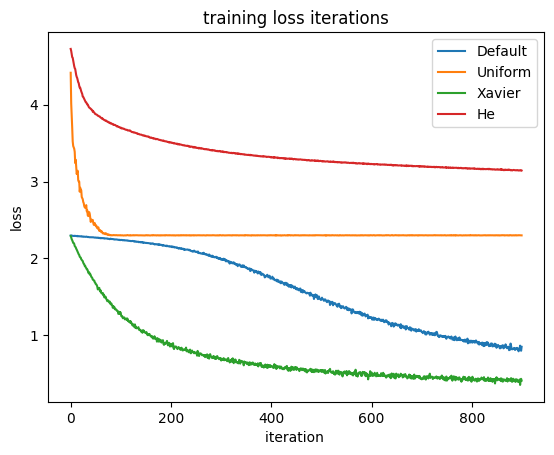

In [45]:
plt.plot(training_results['training_loss'], label = 'Default')
plt.plot(training_results_uniform['training_loss'], label = 'Uniform')
plt.plot(training_results_xavier['training_loss'], label = 'Xavier')
plt.plot(training_results_he['training_loss'], label = 'He')
plt.ylabel('loss')
plt.xlabel('iteration ') 
plt.title('training loss iterations')
plt.legend()

Compare the validation accuracy for each model

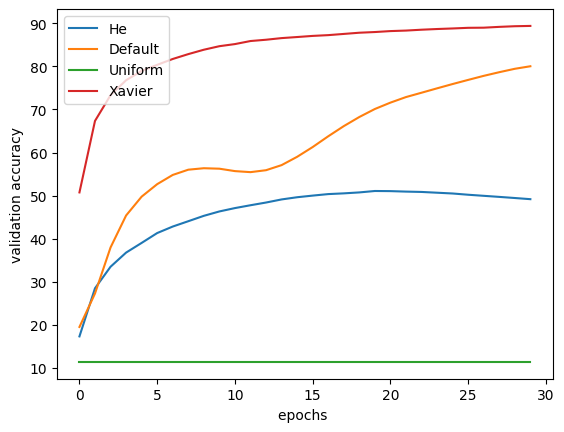

In [46]:
# Plot the accuracy

plt.plot(training_results_he['validation_accuracy'], label='He')
plt.plot(training_results['validation_accuracy'], label='Default')
plt.plot(training_results_uniform['validation_accuracy'], label='Uniform')
plt.plot(training_results_xavier['validation_accuracy'], label = 'Xavier') 
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')   
plt.legend()
plt.show()